# Predicting Loan Grants

## Business Question/ Understanding

A financial is interested in finding what questions should they be asking a prospect to determine whether to grant a loan to them based on the likelihood of the loan being repaid.

## STEP #1

Import libraries and the read the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./data/loan_grants/LoansTrainingSet.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


## Data Understanding

The dataset consists of the following fields:
* Loan ID: A unique Identifier for the loan information.

* Customer ID: A unique identifier for the customer. Customers may have more than one loan.

* Loan Status: A categorical variable indicating if the loan was paid back or defaulted.

* Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.

* Term: A categorical variable indicating if it is a short term or long term loan.

* Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.

* Years in current job: A categorical variable indicating how many years the customer has been in their current job.

* Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage

* Annual Income: The customer's annual income

* Purpose: A description of the purpose of the loan.

* Monthly Debt: The customer's monthly payment for their existing loans

* Years of Credit History: The years since the first entry in the customer’s credit history

* Months since last delinquent: Months since the last loan delinquent payment

* Number of Open Accounts: The total number of open credit cards

* Number of Credit Problems: The number of credit problems in the customer records.

* Current Credit Balance: The current total debt for the customer

* Maximum Open Credit: The maximum credit limit for all credit sources.

* Bankruptcies: The number of bankruptcies

* Tax Liens: The number of tax liens.

To make our prediction model, we will be using "Loan Status" as our dependent variable and the independent variables or the features will be used to train the model. 

Let's take a closer look at the data and see if there is any missing data to clean up or remove from the set of features.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            256984 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [3]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job                 0
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

We will use describe function to get descriptive statistics about the numerical columns 

In [4]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


## Data Exploration

### Loan Status

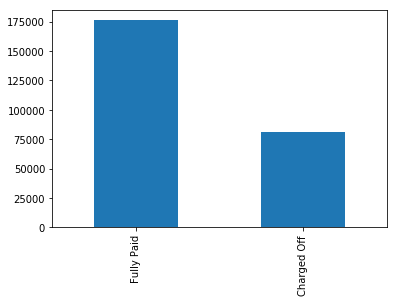

In [5]:
df['Loan Status'].value_counts().plot(kind='bar')

### Loan ID

In [6]:
df['Loan ID'].value_counts()

de5e38c0-5e62-46c1-87f0-e412dc59140c    4
a71fc37a-2be4-4740-abad-a8084f4c4310    4
f14d2349-dd5a-4dfe-a595-912483a27a0d    4
b624940f-da82-410b-b885-77d92c2e4f0c    4
9fa4e052-1e55-42d8-bf98-e8e387f02b97    4
a17849ea-050c-4ec2-8c77-96b2a16972a1    4
16af49e2-5d1a-4b74-88ce-12418bc7dd98    4
4e414992-4479-455a-8dad-d389c5268bb7    4
1b4965ab-32ec-4b4c-aff6-278586e6e2d0    4
fc6500b0-93df-4aa4-b6cc-f5ed86ac58b6    4
8b9af012-ab26-425e-81c2-42d2993abd77    4
f3f53980-40f8-423c-bf34-9426fc606a82    4
e494abb7-e0ea-4416-975c-b730ee36df4d    4
655d6698-7703-40cf-9d12-73b7bb89e54b    4
bcd3bf88-a39d-4d24-9e20-b77df35899e0    4
19d14037-d883-47fe-8413-148a85096c92    4
75d19b75-80db-485b-aea2-1266617eeb59    4
e539e675-417a-488e-853c-37c3475337d1    4
9ef9c0d0-4f1c-4810-8c41-435234512e47    4
eacea519-c64e-4d6f-8cc0-2d0151b89011    4
ae836f1f-2039-4657-bb1a-3c479f044254    4
7123a125-4fdf-4bcd-9e98-1f38a9df6914    4
64e39470-9848-45ed-9589-ae84eb78b929    4
f28d1d2f-d5fc-425b-833c-d1ca2d4287

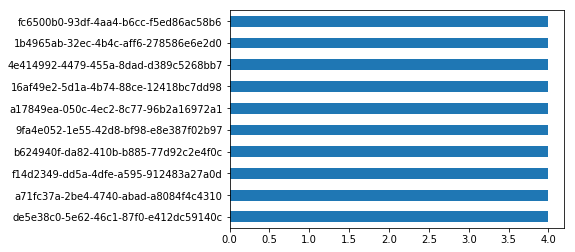

In [7]:
df['Loan ID'].value_counts().head(10).plot(kind='barh')

We see that we have duplicated ['Loan ID'], which should be a unique field as per the data dictionary

In [8]:
df1 = df.select_dtypes(include=['object'])
df2 = df.select_dtypes(exclude=['object'])

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 9 columns):
Loan ID                 256984 non-null object
Customer ID             256984 non-null object
Loan Status             256984 non-null object
Term                    256984 non-null object
Years in current job    256984 non-null object
Home Ownership          256984 non-null object
Purpose                 256984 non-null object
Monthly Debt            256984 non-null object
Maximum Open Credit     256984 non-null object
dtypes: object(9)
memory usage: 17.6+ MB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 10 columns):
Current Loan Amount             256984 non-null int64
Credit Score                    195308 non-null float64
Annual Income                   195308 non-null float64
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Bankruptcies                    256455 non-null float64
Tax Liens                       256961 non-null float64
dtypes: float64(6), int64(4)
memory usage: 19.6 MB


In [11]:
df1.tail(2)

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,Short Term,9 years,Home Mortgage,Debt Consolidation,$297.96,20090
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,Long Term,10+ years,Home Mortgage,Debt Consolidation,"$2,525.82",62371


In [12]:
df2['Loan ID'] = df['Loan ID']
df2.tail(2)

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan ID
256982,12116,746.0,52504.0,15.1,82.0,8,0,3315,0.0,0.0,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe
256983,27902,678.0,117480.0,18.0,11.0,10,0,28317,0.0,0.0,ffffe32e-ed17-459f-9cfd-7b9ee7972933


In [13]:
len(df1.drop_duplicates(subset=['Loan ID']))

215700

In [14]:
len(df2.groupby('Loan ID').max())

215700

In [15]:
df1 = df1.drop_duplicates(subset=['Loan ID'])
df2 = df2.groupby('Loan ID').max().reset_index()

In [16]:
df1.head(2)

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,$584.03,16056
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,Short Term,4 years,Home Mortgage,other,"$1,106.04",19149


In [17]:
df2.head(2)

,Loan ID,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,11520,741.0,33694.0,12.3,41.0,10,0,6760,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,3441,734.0,42269.0,26.3,NaN,17,0,6262,0.0,0.0


In [18]:
df = df1.merge(df2)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 215699
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Customer ID                     215700 non-null object
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            215700 non-null object
Home Ownership                  215700 non-null object
Purpose                         215700 non-null object
Monthly Debt                    215700 non-null object
Maximum Open Credit             215700 non-null object
Current Loan Amount             215700 non-null int64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null int64
Number of Credit Problems       215700 non-null int64
Current C

In [20]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Term                                 0
Years in current job                 0
Home Ownership                       0
Purpose                              0
Monthly Debt                         0
Maximum Open Credit                  0
Current Loan Amount                  0
Credit Score                     44498
Annual Income                    44498
Years of Credit History              0
Months since last delinquent    118262
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Bankruptcies                       452
Tax Liens                           22
dtype: int64

### Credit Score

In [21]:
df['Credit Score'].min(), df['Credit Score'].max() 

(585.0, 7510.0)

Credit Score is suppose to only contain values ranging from 0 to 800, but the max is 7510. This needs to be further investigated, looking at values that are greater than 850.

In [22]:
df[df['Credit Score']>850].head()

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,Long Term,6 years,Rent,Business Loan,$542.29,16954,24613,6640.0,49225.0,17.6,73.0,7,0,14123,0.0,0.0
45,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,Short Term,1 year,Own Home,Debt Consolidation,$633.29,24317,6463,7320.0,25248.0,19.9,74.0,9,0,8025,0.0,0.0
60,000f1140-ef9f-42f9-9898-f9b3162bf0da,442c2d9b-3d95-44a9-bcb4-0dc80a941e3c,Charged Off,Short Term,10+ years,Home Mortgage,Debt Consolidation,$538.15,7811,6007,7180.0,43052.0,23.6,13.0,6,0,5077,0.0,0.0
61,000f5c35-dc3e-415f-9c22-e355ef96d78b,0ecf29b6-93eb-4c13-b853-a9cbdfc7f85b,Charged Off,Long Term,2 years,Rent,Debt Consolidation,"$1,931.07",90199,12899,6670.0,133947.0,18.4,7.0,16,0,39417,0.0,0.0
66,001227a1-4490-47c6-ada7-20faf636e9a3,3d4a8985-0b72-4084-8b20-f441d9868483,Charged Off,Short Term,< 1 year,Home Mortgage,Other,$711.03,12041,5060,7270.0,62738.0,20.4,22.0,6,0,10777,0.0,0.0


We can see that there is an additional 0, that changes the credit score into thousands. It is safe to assume these credit score values were incorrectly inputted as they all end with a 0. Without the 0, the values of "Credit Score" fall within the appropriate range. We will remove the 0's on the right side from these values by dividing "Credit Score" by 10.

In [23]:
df['Credit Score'] = df['Credit Score'].map(lambda x: x/10 if x > 800 else x)
df['Credit Score'].head(20)

0     741.0
1     734.0
2     747.0
3     747.0
4     746.0
5     716.0
6     664.0
7       NaN
8     733.0
9     742.0
10    742.0
11    701.0
12    744.0
13    744.0
14    729.0
15    734.0
16      NaN
17    745.0
18    734.0
19    733.0
Name: Credit Score, dtype: float64

From above, we still have NaN values in "Credit Score" column, we have two option

OPTION 1: Fill the NaN's

OPTION 2: Remove all the NaN's

Let's check what type of distribution "Credit Score" is to see how we can fill null values. This will help us decided what's the best option

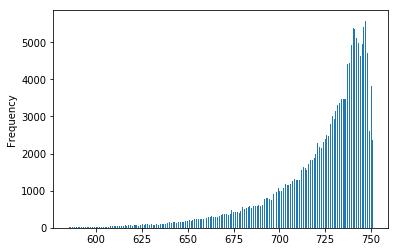

In [24]:
df['Credit Score'].dropna().plot(kind='hist', bins=300)

In [25]:
df['Credit Score'].mean(), df['Credit Score'].median(), df['Credit Score'].mode()

(722.7556979474539, 732.0, 0    747.0
 dtype: float64)

In [26]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())

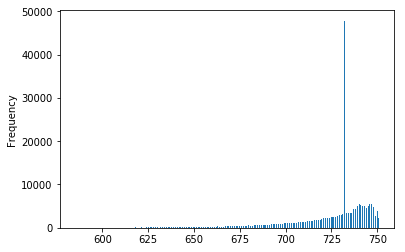

In [27]:
df['Credit Score'].dropna().plot(kind='hist', bins=300)

### Annual Income 

In [28]:
df['Annual Income'].min(skipna=False), df['Annual Income'].max() 

(nan, 8713547.0)

In [29]:
df[df['Annual Income']>2000000]

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
28599,21ea699e-4eea-4908-9d67-7ae36f31d221,4e0d2d18-db25-40f6-ab3a-7746cd676d2e,Fully Paid,Short Term,10+ years,Home Mortgage,Home Improvements,$783.92,9308,99999999,746.0,5879400.0,14.9,40.0,4,0,8917,0.0,0.0
33412,2790a78c-3405-4403-b9fa-c46dcb296c02,824b8012-5314-453d-aa28-b9ee9e4bfded,Fully Paid,Short Term,7 years,Home Mortgage,Home Improvements,"$4,516.24",42017,99999999,735.0,2267570.0,16.4,NaN,8,0,40925,0.0,0.0
92786,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,Short Term,10+ years,Home Mortgage,Debt Consolidation,$798.74,30429,8006,725.0,8713547.0,16.0,NaN,11,0,16462,0.0,0.0
142086,a88c6d42-44b3-4a29-afdf-84e31a4ce246,419bfdfe-66fa-4e7e-a568-e4e090c39796,Fully Paid,Short Term,3 years,Home Mortgage,Home Improvements,$564.24,15725,9899,748.0,7523240.0,27.4,21.0,18,0,2469,0.0,0.0


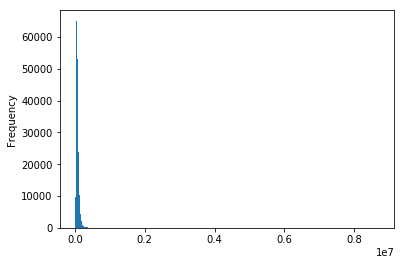

In [30]:
df['Annual Income'].dropna().plot(kind='hist', bins=300)

In [31]:
df['Annual Income'].mean(), df['Annual Income'].median(), df['Annual Income'].mode()

(72807.4829032371, 62112.0, 0    59346.0
 dtype: float64)

In [32]:
df['Annual Income'].isnull().sum()

44498

In [33]:
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())

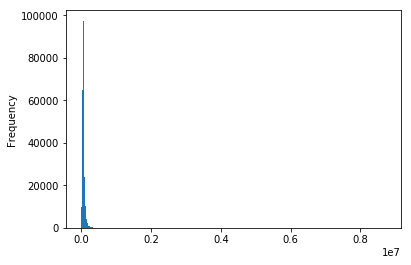

In [34]:
df['Annual Income'].plot(kind='hist', bins=300)

In [35]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Term                                 0
Years in current job                 0
Home Ownership                       0
Purpose                              0
Monthly Debt                         0
Maximum Open Credit                  0
Current Loan Amount                  0
Credit Score                         0
Annual Income                        0
Years of Credit History              0
Months since last delinquent    118262
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Bankruptcies                       452
Tax Liens                           22
dtype: int64

Now both "Credit Score" and "Annual Income" columns have no missing values :)

In [36]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Term                             object
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                     object
Maximum Open Credit              object
Current Loan Amount               int64
Credit Score                    float64
Annual Income                   float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

### Monthly Debt and Maximum Open Credit

Monthly Debt and Maximum Open Credit show as object, but they should be float64 since they are numeric values. 

In [37]:
df.head()

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,$584.03,16056,11520,741.0,33694.0,12.3,41.0,10,0,6760,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,Short Term,4 years,Home Mortgage,other,"$1,106.04",19149,3441,734.0,42269.0,26.3,NaN,17,0,6262,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,"$1,321.85",28335,21029,747.0,90126.0,28.8,NaN,5,0,20967,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,Short Term,10+ years,Own Home,Debt Consolidation,$751.92,43915,18743,747.0,38072.0,26.2,NaN,9,0,22529,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,Short Term,4 years,Rent,Debt Consolidation,$355.18,37081,11731,746.0,50025.0,11.5,NaN,12,0,17391,0.0,0.0


In [38]:
# convert Monthly Debt and Maximum Open Credit to float64 data type
df['Monthly Debt'] = df['Monthly Debt'].replace( '[\$, ]','', regex=True ).astype(float) # Removes the $ and converts to float
df['Monthly Debt'].head()

0     584.03
1    1106.04
2    1321.85
3     751.92
4     355.18
Name: Monthly Debt, dtype: float64

In [39]:
# convert Maximum Open Credit to int64 data type
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype(int)

ValueError: invalid literal for long() with base 10: '#VALUE!'

In [41]:
df[df['Maximum Open Credit'] == "#VALUE!"]

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
154841,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,Short Term,2 years,Rent,Debt Consolidation,506.34,#VALUE!,1470,725.0,39200.0,15.3,26.0,3,0,0,0.0,0.0
157242,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,Charged Off,Long Term,7 years,Home Mortgage,Home Improvements,1306.86,#VALUE!,23897,697.0,49785.0,13.0,NaN,6,0,0,0.0,0.0


In [42]:
# convert Maximum Open Credit to int64 data type
df['Maximum Open Credit'] = df['Maximum Open Credit'].convert_objects(convert_numeric=True)
df['Maximum Open Credit'].head()

0    16056.0
1    19149.0
2    28335.0
3    43915.0
4    37081.0
Name: Maximum Open Credit, dtype: float64

In [ ]:
df.info()

In [43]:
df[df['Maximum Open Credit'].isnull()]

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
154841,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,Short Term,2 years,Rent,Debt Consolidation,506.34,NaN,1470,725.0,39200.0,15.3,26.0,3,0,0,0.0,0.0
157242,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,Charged Off,Long Term,7 years,Home Mortgage,Home Improvements,1306.86,NaN,23897,697.0,49785.0,13.0,NaN,6,0,0,0.0,0.0


In [44]:
df['Maximum Open Credit'].mean(), df['Maximum Open Credit'].median(), df['Maximum Open Credit'].mode()

(36983.81481052212, 22060.0, 0    0.0
 dtype: float64)

In [45]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median())

Great! Credit Score values fall within the range we need and our columns are converted to their proper data types. Now to check our unique values in our categorical varibles. 

In [46]:
df.nunique()

Loan ID                         215700
Customer ID                     215700
Loan Status                          2
Term                                 2
Years in current job                12
Home Ownership                       4
Purpose                             10
Monthly Debt                    128755
Maximum Open Credit              68883
Current Loan Amount              27308
Credit Score                       167
Annual Income                    60412
Years of Credit History            541
Months since last delinquent       131
Number of Open Accounts             59
Number of Credit Problems           12
Current Credit Balance           45630
Bankruptcies                         8
Tax Liens                           12
dtype: int64

In [47]:
print("Loan Status", df['Loan Status'].unique())
print("Term: ", df['Term'].unique())
print("Years in current job: ", df['Years in current job'].unique())
print("Home Ownership: ", df['Home Ownership'].unique())
print("Purpose: ", df['Purpose'].unique())

Loan Status ['Fully Paid' 'Charged Off']
Term:  ['Short Term' 'Long Term']
Years in current job:  ['10+ years' '4 years' '6 years' '5 years' 'n/a' '3 years' '2 years'
 '< 1 year' '1 year' '7 years' '9 years' '8 years']
Home Ownership:  ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
Purpose:  ['Debt Consolidation' 'other' 'Business Loan' 'Home Improvements'
 'Buy House' 'Other' 'Buy a Car' 'Medical Bills' 'Take a Trip'
 'Educational Expenses']


Looks like "Home Ownership" and "Purpose" have extra categorical variables. "HaveMorgage" will be changed to "Home Morgage" in the "Home Ownership" column while "other" will be combined with "Other" column in the "Purpose" column.

In [48]:
# convert "HaveMortgage" to "Home Morgage"
df['Home Ownership'] = df['Home Ownership'].map(lambda x: 'Home Mortgage' if x == 'HaveMortgage' else x)

In [49]:
# convert "other to "Other"
df['Purpose'] = df['Purpose'].map(lambda x: 'Other' if x == 'other' else x)

In [50]:
# check the unique values
print("Home Ownership: ", df['Home Ownership'].unique())
print("Purpose: ", df['Purpose'].unique())

Home Ownership:  ['Home Mortgage' 'Own Home' 'Rent']
Purpose:  ['Debt Consolidation' 'Other' 'Business Loan' 'Home Improvements'
 'Buy House' 'Buy a Car' 'Medical Bills' 'Take a Trip'
 'Educational Expenses']


In [51]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Term                                 0
Years in current job                 0
Home Ownership                       0
Purpose                              0
Monthly Debt                         0
Maximum Open Credit                  0
Current Loan Amount                  0
Credit Score                         0
Annual Income                        0
Years of Credit History              0
Months since last delinquent    118262
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Bankruptcies                       452
Tax Liens                           22
dtype: int64

Let's determine what to do with the rest of the missing variables "Months since last delinquent", "Bankruptcies", and "Tax Liens". Since "Months since last delinquent" has the most missing data, we will start with it.

### Months since last delinquent

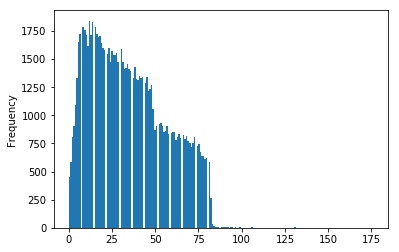

In [52]:
df['Months since last delinquent'].dropna().plot(kind='hist', bins=200)

Text(0.5,0,u'Months since last delinquent')

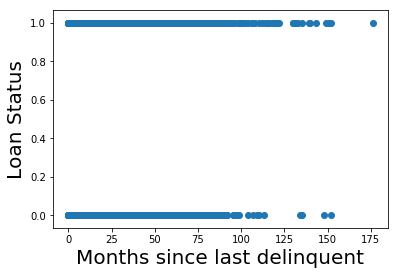

In [53]:
# Prepare data for plotting
df2 = df[df['Months since last delinquent'].notnull()] # makes new data frame without null values
x = df2['Months since last delinquent']
y = df2['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

# make the plot
fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(x, y)
ax.set_ylabel('Loan Status', fontsize=20)  
ax.set_xlabel('Months since last delinquent', fontsize=20)

By plotting the "Months since last delinquent" vs "Loan Status", we can see if there is any correlation between the months since last delinquent to the loan status being paid off or not. According to the plot, there is no distinguishable differences between the two variables, thus we can assume that "Months since last delinquent" may not contribute much to our prediction model. Therefore, we will drop this column. 

In [54]:
df = df.drop(['Months since last delinquent'], axis = 1)

We will now be looking into our remaining null values in "Bankruptcies", and "Tax Liens". 

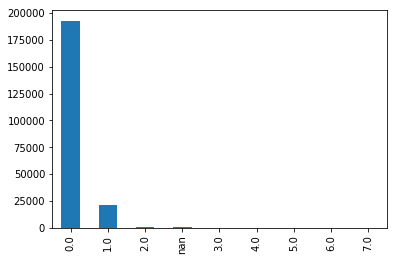

In [55]:
df.Bankruptcies.value_counts(dropna=False).plot(kind='bar')

Text(0.5,0,u'Bankruptcies')

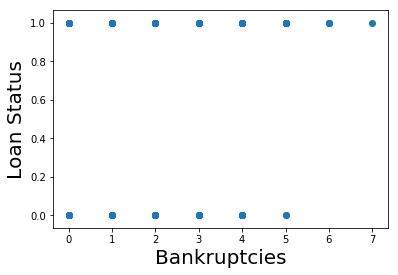

In [56]:
# Prepare data for plotting
df2 = df[df['Bankruptcies'].notnull()] # makes new data frame without null values
x = df2['Bankruptcies']
y = df2['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

# make the plot
fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(x, y)
ax.set_ylabel('Loan Status', fontsize=20)  
ax.set_xlabel('Bankruptcies', fontsize=20)

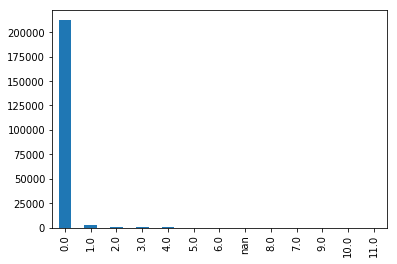

In [57]:
df['Tax Liens'].value_counts(dropna=False).plot(kind='bar')

Text(0.5,0,u'Tax Liens')

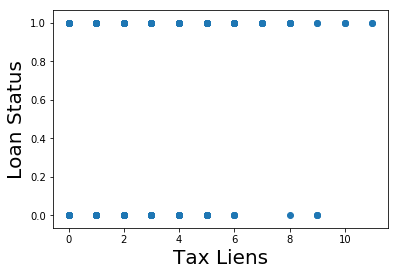

In [58]:
# Prepare data for plotting
df2 = df[df['Tax Liens'].notnull()] # makes new data frame without null values
x = df2['Tax Liens']
y = df2['Loan Status'].map(lambda x: 1 if x == 'Fully Paid' else 0)

# make the plot
fig = plt.figure()
ax = fig.add_subplot(111)  
ax.scatter(x, y)
ax.set_ylabel('Loan Status', fontsize=20)  
ax.set_xlabel('Tax Liens', fontsize=20)

Looking at both Bankruptcies and Tax Liens, there does not seem to be much data missing relative to the number of rows. Also, plotting them against loan status does not show any noticeable correlations. Therefore, we will be dropping the null rows for these variables as well. 

In [59]:
df = df[df['Bankruptcies'].notnull()] # drops rows in Maximum Open Credit with null values
df = df[df['Tax Liens'].notnull()] # drops rows in Maximum Open Credit with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215248 entries, 0 to 215699
Data columns (total 18 columns):
Loan ID                      215248 non-null object
Customer ID                  215248 non-null object
Loan Status                  215248 non-null object
Term                         215248 non-null object
Years in current job         215248 non-null object
Home Ownership               215248 non-null object
Purpose                      215248 non-null object
Monthly Debt                 215248 non-null float64
Maximum Open Credit          215248 non-null float64
Current Loan Amount          215248 non-null int64
Credit Score                 215248 non-null float64
Annual Income                215248 non-null float64
Years of Credit History      215248 non-null float64
Number of Open Accounts      215248 non-null int64
Number of Credit Problems    215248 non-null int64
Current Credit Balance       215248 non-null int64
Bankruptcies                 215248 non-null float64
Tax

## Years in current job

In [60]:
df['Years in current job'].value_counts()

10+ years    66628
2 years      19778
< 1 year     17432
3 years      17388
5 years      14967
1 year       14069
4 years      13601
6 years      12208
7 years      11702
8 years      10224
n/a           8990
9 years       8261
Name: Years in current job, dtype: int64

In [61]:
df['Years in current job'].replace(to_replace=["years","year","<","\+"," "],value="", regex=True, inplace=True)

In [62]:
df['Years in current job'].value_counts()

10     66628
1      31501
2      19778
3      17388
5      14967
4      13601
6      12208
7      11702
8      10224
n/a     8990
9       8261
Name: Years in current job, dtype: int64

In [63]:
df['Years in current job'] = df['Years in current job'].replace("n/a","0", regex=True)

In [64]:
df['Years in current job'].value_counts()

10    66628
1     31501
2     19778
3     17388
5     14967
4     13601
6     12208
7     11702
8     10224
0      8990
9      8261
Name: Years in current job, dtype: int64

In [65]:
df['Years in current job'] = pd.Categorical(df['Years in current job'])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215248 entries, 0 to 215699
Data columns (total 18 columns):
Loan ID                      215248 non-null object
Customer ID                  215248 non-null object
Loan Status                  215248 non-null object
Term                         215248 non-null object
Years in current job         215248 non-null category
Home Ownership               215248 non-null object
Purpose                      215248 non-null object
Monthly Debt                 215248 non-null float64
Maximum Open Credit          215248 non-null float64
Current Loan Amount          215248 non-null int64
Credit Score                 215248 non-null float64
Annual Income                215248 non-null float64
Years of Credit History      215248 non-null float64
Number of Open Accounts      215248 non-null int64
Number of Credit Problems    215248 non-null int64
Current Credit Balance       215248 non-null int64
Bankruptcies                 215248 non-null float64
T

Okay, it looks like our data is completely filled in :)

In [67]:
print("Total unique Loan IDs: ", df['Loan ID'].nunique())
print("Total unique Customer IDs: ", df['Customer ID'].nunique())
print("Total entries: ", len(df))

Total unique Loan IDs:  215248
Total unique Customer IDs:  215248
Total entries:  215248


Now the data is all cleaned up. It's time for some feature engineering

## Feature Engineering

In [68]:
df.head(2)

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,Short Term,10,Home Mortgage,Debt Consolidation,584.03,16056.0,11520,741.0,33694.0,12.3,10,0,6760,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,Short Term,4,Home Mortgage,Other,1106.04,19149.0,3441,734.0,42269.0,26.3,17,0,6262,0.0,0.0


In [ ]:
import seaborn as sns
df['Loan Status'] = df['Loan Status'].map(lambda x: 1 if x=='Fully Paid' else 0)
sns.pairplot(df, x_vars=df['Loan Status'], y_vars=df['Monthly Debt'])

Createing new features

In [68]:
df['debt_to_income'] = (df['Monthly Debt']+1)/((df['Annual Income']+1)/12)
df['Ratio_loan_paid'] = (df['Current Loan Amount']+1)/(df['Current Credit Balance']+1)

In [69]:
df.head(2)

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,debt_to_income,Ratio_loan_paid
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,Short Term,10,Home Mortgage,Debt Consolidation,584.03,16056.0,11520,741.0,33694.0,12.3,10,0,6760,0.0,0.0,0.208350,1.704038
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,Short Term,4,Home Mortgage,Other,1106.04,19149.0,3441,734.0,42269.0,26.3,17,0,6262,0.0,0.0,0.314277,0.549577


### Creating Target variable

In [70]:
y = df[['Loan Status']]

In [76]:
y['Loan Status'] = y['Loan Status'].map(lambda x: 1 if x=='Fully Paid' else 0)

KeyError: 'Loan Status'

In [72]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215248 entries, 0 to 215699
Data columns (total 1 columns):
Loan Status    215248 non-null int64
dtypes: int64(1)
memory usage: 3.3 MB


In [73]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215248 entries, 0 to 215699
Data columns (total 1 columns):
Loan Status    215248 non-null int64
dtypes: int64(1)
memory usage: 3.3 MB


In [74]:
x = df.drop(['Loan ID','Customer ID','Loan Status'], axis=1)

In [75]:
x.head()

,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,debt_to_income,Ratio_loan_paid
0,Short Term,10,Home Mortgage,Debt Consolidation,584.03,16056.0,11520,741.0,33694.0,12.3,10,0,6760,0.0,0.0,0.208350,1.704038
1,Short Term,4,Home Mortgage,Other,1106.04,19149.0,3441,734.0,42269.0,26.3,17,0,6262,0.0,0.0,0.314277,0.549577
2,Short Term,10,Home Mortgage,Debt Consolidation,1321.85,28335.0,21029,747.0,90126.0,28.8,5,0,20967,0.0,0.0,0.176131,1.002957
3,Short Term,10,Own Home,Debt Consolidation,751.92,43915.0,18743,747.0,38072.0,26.2,9,0,22529,0.0,0.0,0.237308,0.831957
4,Short Term,4,Rent,Debt Consolidation,355.18,37081.0,11731,746.0,50025.0,11.5,12,0,17391,0.0,0.0,0.085439,0.674563


In [76]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215248 entries, 0 to 215699
Data columns (total 17 columns):
Term                         215248 non-null object
Years in current job         215248 non-null category
Home Ownership               215248 non-null object
Purpose                      215248 non-null object
Monthly Debt                 215248 non-null float64
Maximum Open Credit          215248 non-null float64
Current Loan Amount          215248 non-null int64
Credit Score                 215248 non-null float64
Annual Income                215248 non-null float64
Years of Credit History      215248 non-null float64
Number of Open Accounts      215248 non-null int64
Number of Credit Problems    215248 non-null int64
Current Credit Balance       215248 non-null int64
Bankruptcies                 215248 non-null float64
Tax Liens                    215248 non-null float64
debt_to_income               215248 non-null float64
Ratio_loan_paid              215248 non-null float6

In [77]:
X = pd.get_dummies(x)

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215248 entries, 0 to 215699
Data columns (total 38 columns):
Monthly Debt                    215248 non-null float64
Maximum Open Credit             215248 non-null float64
Current Loan Amount             215248 non-null int64
Credit Score                    215248 non-null float64
Annual Income                   215248 non-null float64
Years of Credit History         215248 non-null float64
Number of Open Accounts         215248 non-null int64
Number of Credit Problems       215248 non-null int64
Current Credit Balance          215248 non-null int64
Bankruptcies                    215248 non-null float64
Tax Liens                       215248 non-null float64
debt_to_income                  215248 non-null float64
Ratio_loan_paid                 215248 non-null float64
Term_Long Term                  215248 non-null uint8
Term_Short Term                 215248 non-null uint8
Years in current job_0          215248 non-null uint8
Years i

In [79]:
X.isnull().sum()

Monthly Debt                    0
Maximum Open Credit             0
Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Bankruptcies                    0
Tax Liens                       0
debt_to_income                  0
Ratio_loan_paid                 0
Term_Long Term                  0
Term_Short Term                 0
Years in current job_0          0
Years in current job_1          0
Years in current job_10         0
Years in current job_2          0
Years in current job_3          0
Years in current job_4          0
Years in current job_5          0
Years in current job_6          0
Years in current job_7          0
Years in current job_8          0
Years in current job_9          0
Home Ownership_Home Mortgage    0
Home Ownership_Own Home         0
Home Ownership_Rent             0
Purpose_Busine

## Modeling
Since this problem results in a binary output, we will select algorithms that are good at classification: Logistic Regression and Gradient Boosting. 

In [80]:
# Split the data into 70% Training Data and 30% Testing Data with seed(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

/Users/Zia/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((172198, 38), (43050, 38), (172198, 1), (43050, 1))

In [82]:
y_test.isnull().sum()

Loan Status    0
dtype: int64

In [83]:
# import our algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, confusion_matrix

In [84]:
# sklearn Logistic Regression
reg = LogisticRegression()
logmodel = reg.fit(X_train, y_train)

# Make predictions and determine accuracy score
y_predlog = logmodel.predict(X_test)

acclog = accuracy_score(y_predlog, y_test)

print(acclog)

0.818095238095


In [85]:
# Gradient Boosting
params = {'n_estimators': 500, 'max_depth': 3,
          'learning_rate': 0.1, 'min_samples_leaf': 1, 'random_state': 42}
gbc = GradientBoostingClassifier(**params)
gbcmodel = gbc.fit(X_train, y_train)

y_predgbc = gbcmodel.predict(X_test)

accgbc = accuracy_score(y_predgbc, y_test)

print(accgbc)

0.826109175377


In [86]:
roc_auc_score(y_predgbc, y_test)

0.70484508256875911

In [87]:
confusion_matrix(y_predgbc, y_test)

array([[ 1457,  1112],
       [ 6374, 34107]])

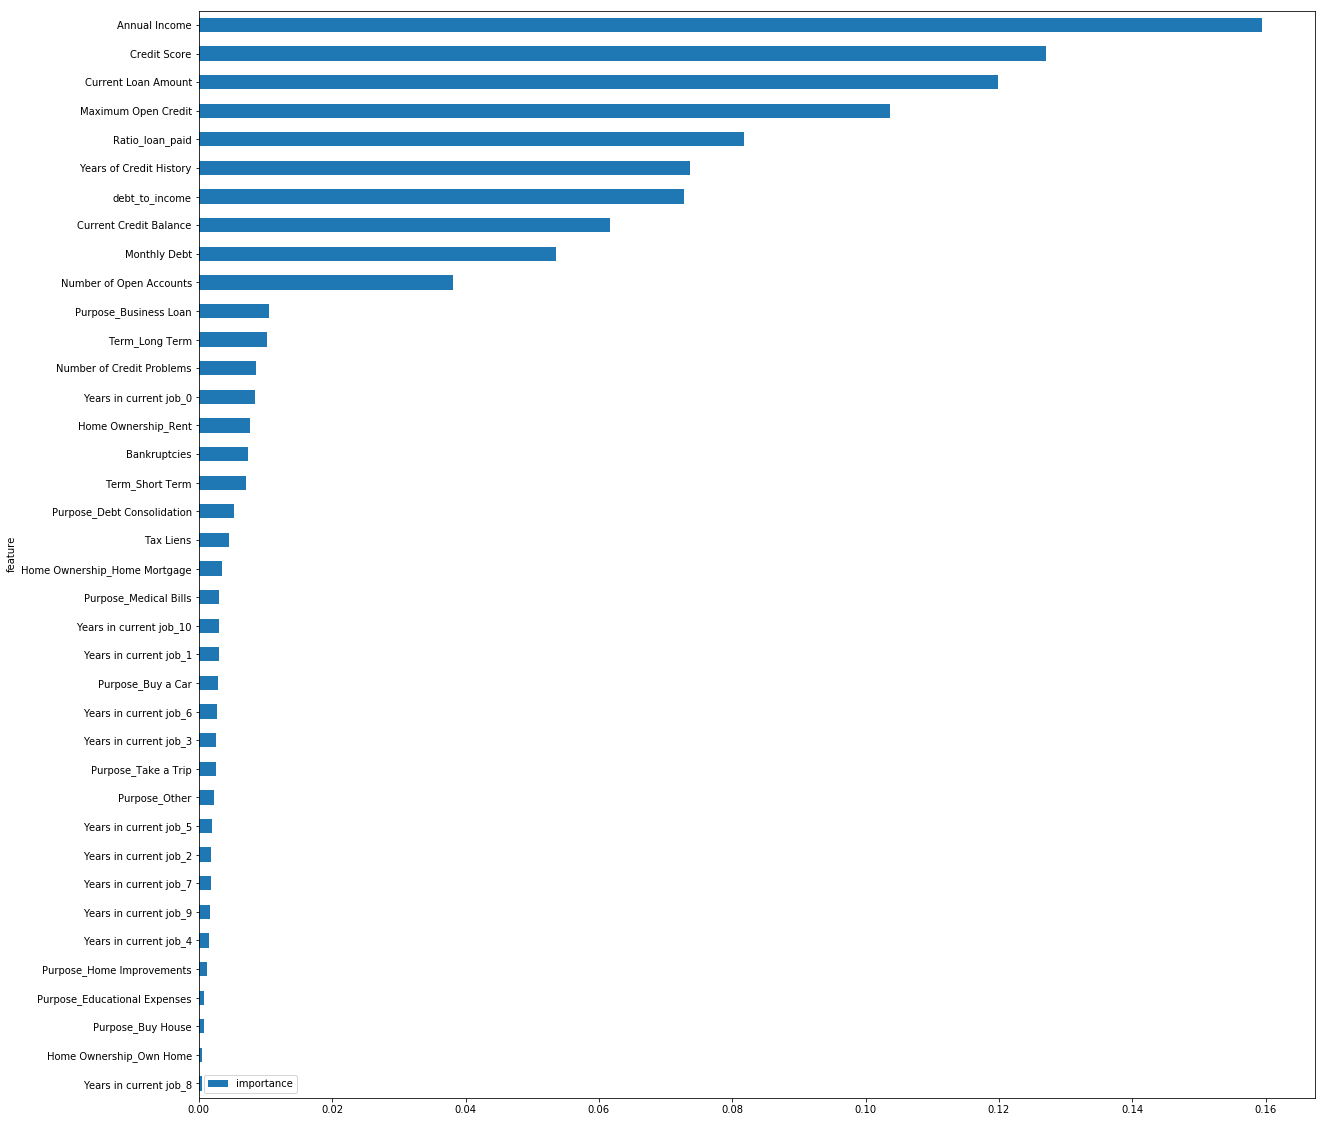

In [88]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = gbcmodel.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

### Top 10 features

Based on the model above the follwoing questions would help determine chances of default. 

In [89]:
features.sort_values(by=['importance'], ascending=False, inplace=True)

In [90]:
features.head(10)

,importance
feature,
Annual Income,0.159422
Credit Score,0.127091
Current Loan Amount,0.119881
Maximum Open Credit,0.103719
Ratio_loan_paid,0.081755
Years of Credit History,0.073709
debt_to_income,0.072760
Current Credit Balance,0.061727
Monthly Debt,0.053549
